<a href="https://colab.research.google.com/github/bhattacharyyad/Scopus_Data/blob/master/Agent_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Install necessary packages
!pip install --upgrade -qq byaldi
!pip install -q pdf2image transformers
!sudo apt-get update
!sudo apt-get install -y poppler-utils
#!sudo apt-get install -y nvidia-driver-535 # Removed this line since we will be running on CPU

# Import necessary libraries
import torch
from byaldi import RAGMultiModalModel
from pdf2image import convert_from_path
from transformers import LlavaForConditionalGeneration, AutoProcessor
import byaldi  # added import

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA is available! Running on GPU.")
else:
    device = torch.device("cpu")
    print("CUDA is not available. Running on CPU.")

# Initialize the model, specifying the device
RAG = RAGMultiModalModel.from_pretrained("vidore/colpali", device=device)

# Load pdf
pdf_path = "content/CfP.pdf"
images = convert_from_path(pdf_path)

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

/usr/local/lib/python3.11/dist-packages/torch/cuda/__init__.py:716: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/78.6M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/700 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/243k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.26M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

In [6]:
RAG.index(
   input_path="content/CfP.pdf",
   index_name="image_index",
   store_collection_with_index=False,
   overwrite=True
)

Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Index exported to .byaldi/image_index
Index exported to .byaldi/image_index


{0: 'content/CfP.pdf'}

In [10]:
text_query = "Submission due"
results = RAG.search(text_query, k=1)
results

[{'doc_id': 0, 'page_num': 2, 'score': 13.9375, 'metadata': {}, 'base64': None}]

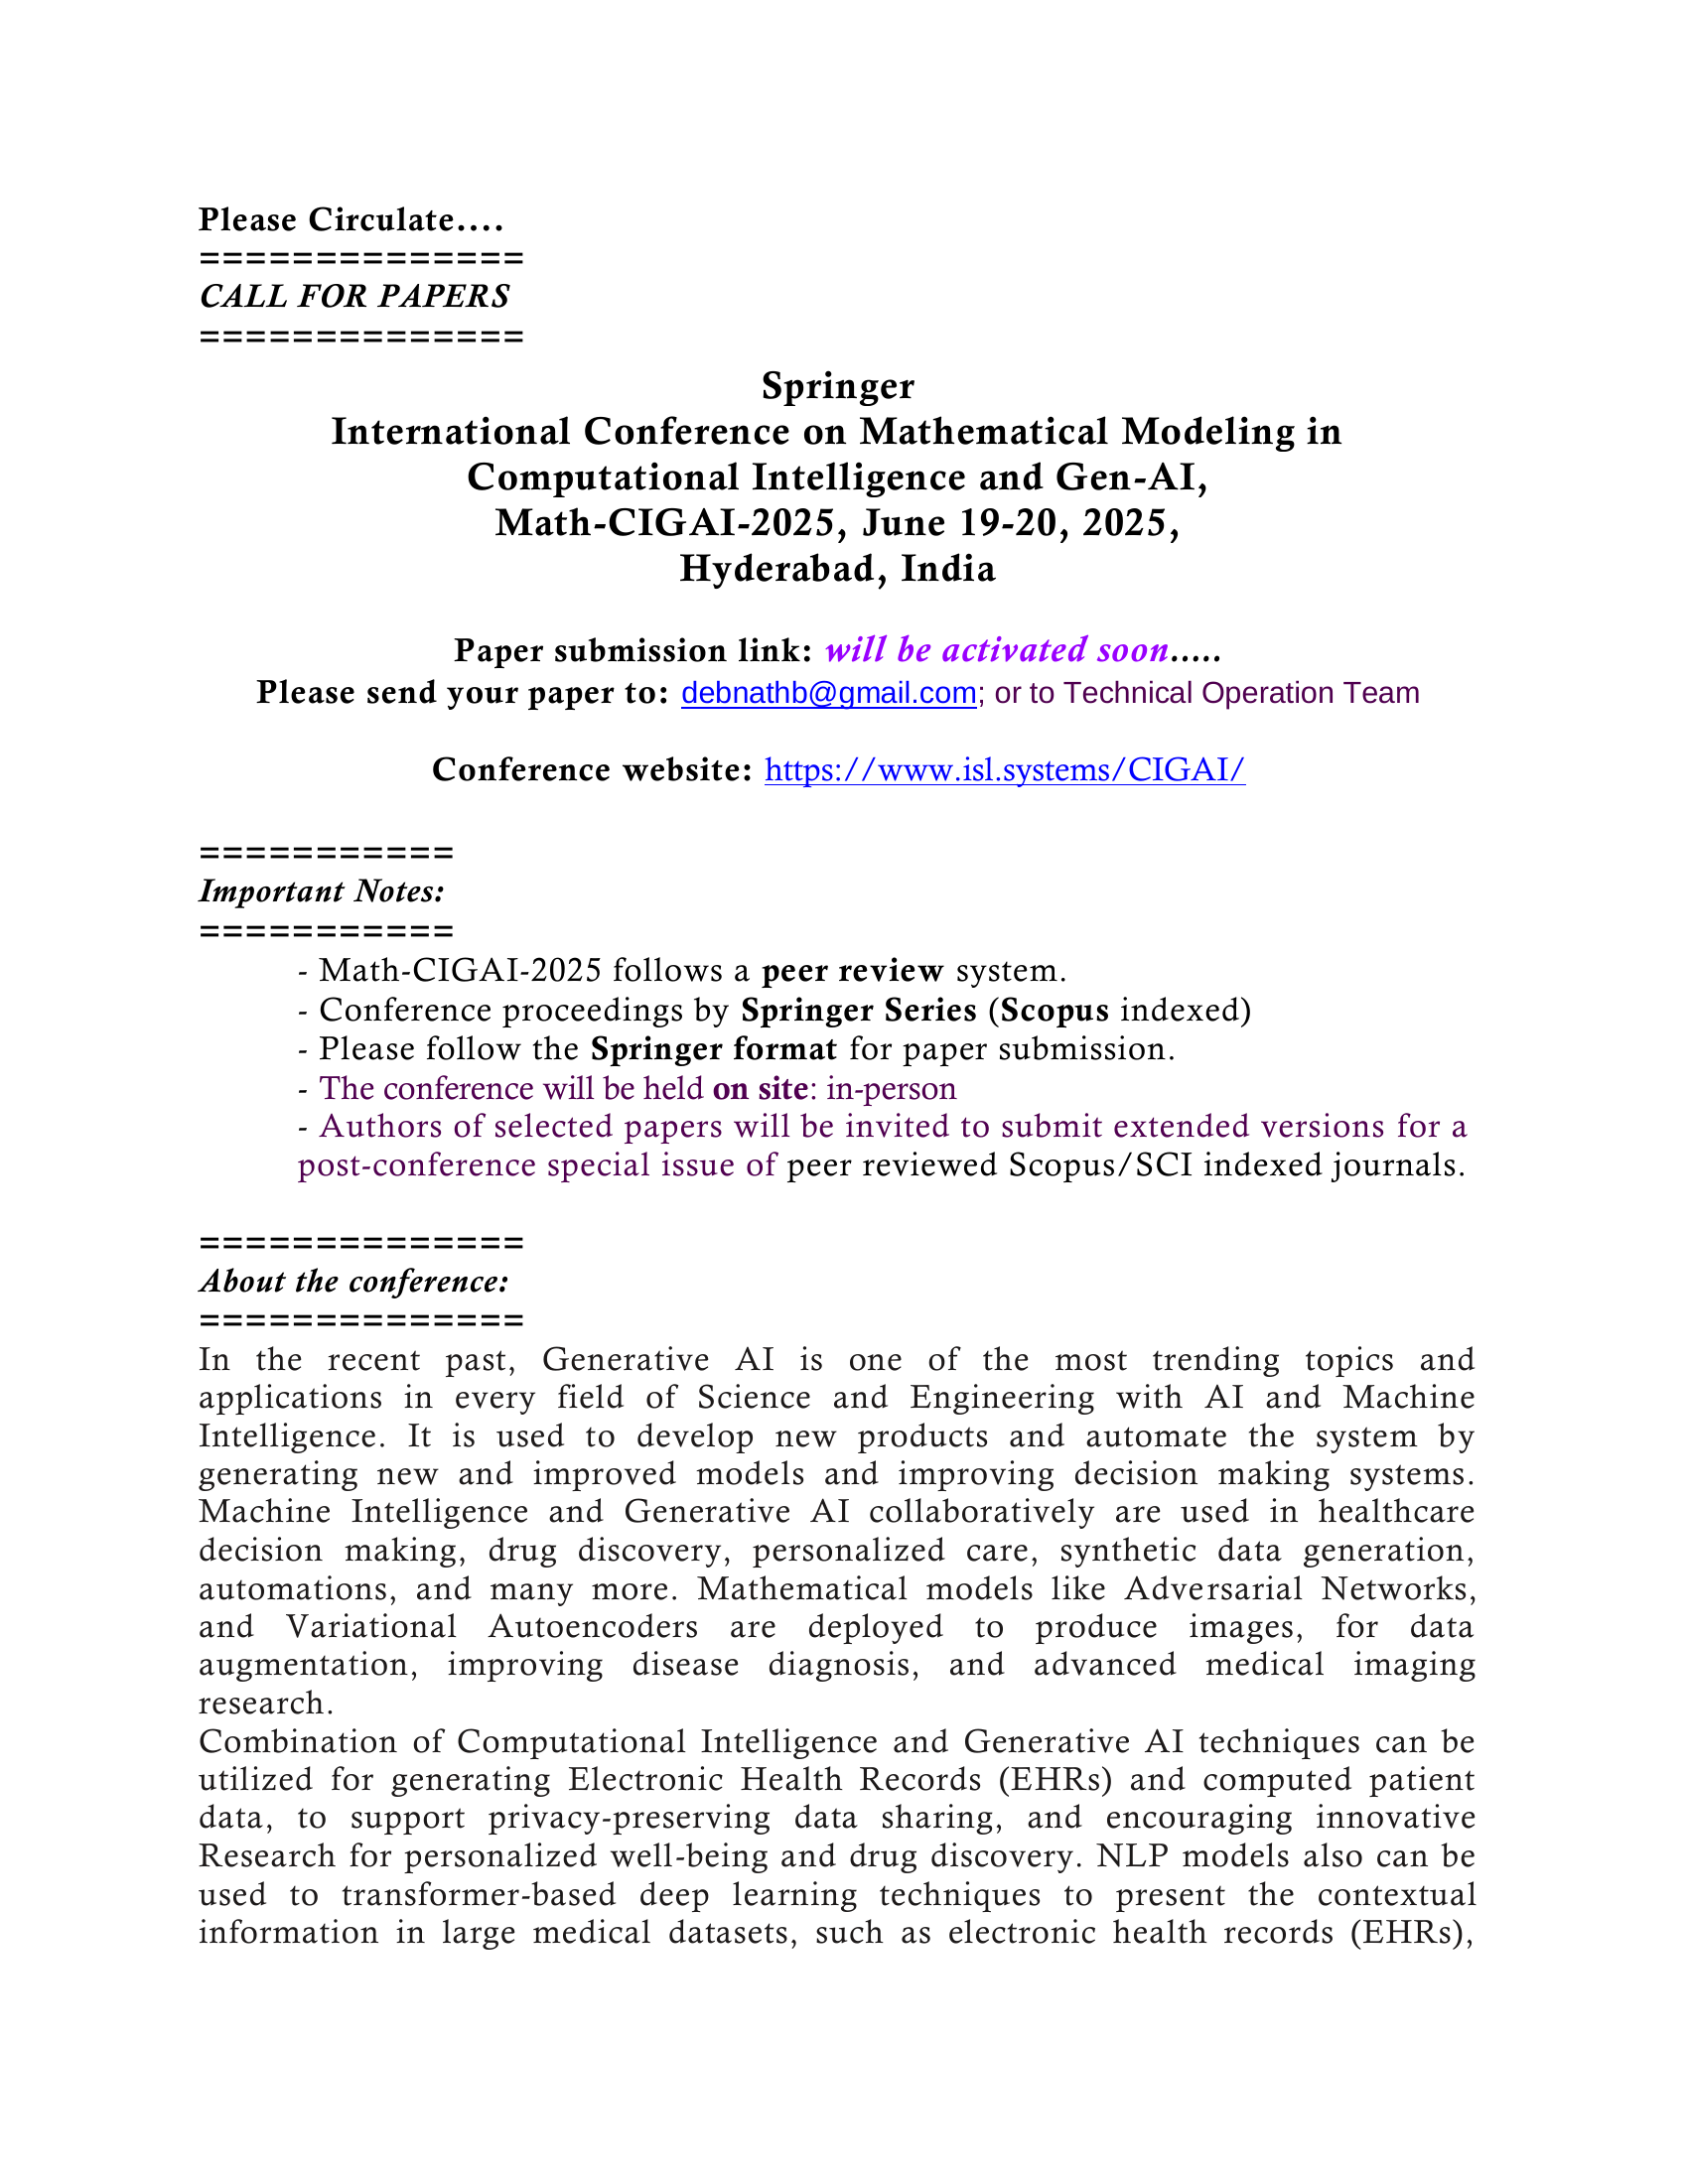

In [11]:
images[results[0]["page_num"] - 2]